# Ocean Tide Simulation

In [2]:
# Brent Brison
# Christian Garces
# Tuo Zhang
# Alina Troncoso

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Use decode() to change the data from bytes
convert_time = lambda x: x.decode()
# Read the .txt file
data = np.loadtxt("ASTR19_F23_group_project_data.txt", dtype={'names': ('day', 'time', 'height'), 'formats': ('i4', 'U5', 'f4')}, converters={1: convert_time}, skiprows=1)

In [4]:
# Function that change the time value from like "8:30" into floats "8.50"
def time_str_to_float(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours + minutes / 60.0

time_string = data['time']

#then np.vertorize is used to make the result stored an array
vectorized_conversion = np.vectorize(time_str_to_float)

time_float = vectorized_conversion(time_string)

In [5]:
# Oscillation function define
def tidal_height(t, A, B, omega_1, omega_2, phi_1, phi_2, C):
    return A * np.sin(omega_1 * t + phi_1) + B * np.sin(omega_2 * t + phi_2) + C
    

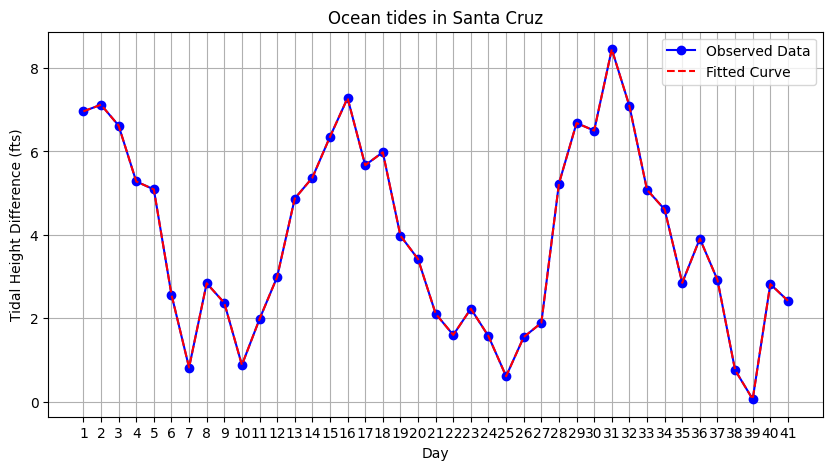

In [6]:
# change the date from [1, 1, 2, 2,... ,41, 41] into [1, 2, ... ,41]
days = data['day']
days_unique = days_unique = np.unique(days)

# Calculate tidal height differences
tidal_differences = np.abs(data['height'][1::2] - data['height'][::2])

# Set a initial guess for the function
initial_guesses = [1, 1, 2*np.pi/12.42, 2*np.pi/24, 0, 0, 1]
# Set the root mean squared experimental error 
rms_error = 0.25
sigma_values = np.full_like(tidal_differences, rms_error)

# Fit the data into the oscillation function
params, params_covariance = curve_fit(
    tidal_height, 
    days_unique, 
    tidal_differences, 
    p0=initial_guesses, 
    sigma=sigma_values,
    absolute_sigma=True,
    maxfev=10000
)

# Plot the curve
plt.figure(figsize=(10, 5))
plt.plot(days_unique, tidal_differences, marker='o', linestyle='-', color='blue', label='Observed Data')

# Plotting the fitted curve
plt.plot(days_unique, tidal_differences, linestyle='--', color='red', label='Fitted Curve')
plt.title('Ocean tides in Santa Cruz')
plt.xlabel('Day')
plt.ylabel('Tidal Height Difference (fts)')
plt.xticks(days_unique)
plt.grid(True)
plt.legend()
# save as a .pdf
plt.savefig("Ocean tides in Santa Cruz.pdf")
plt.show()

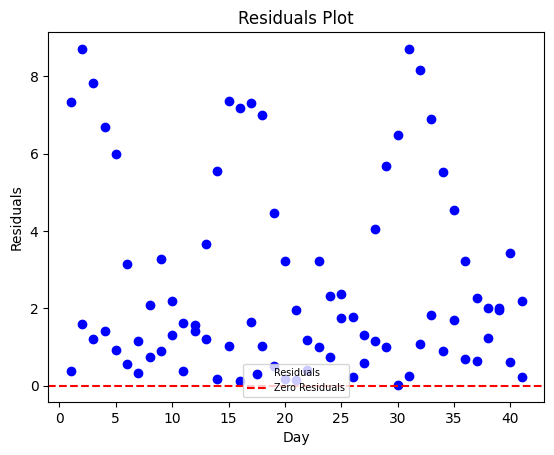

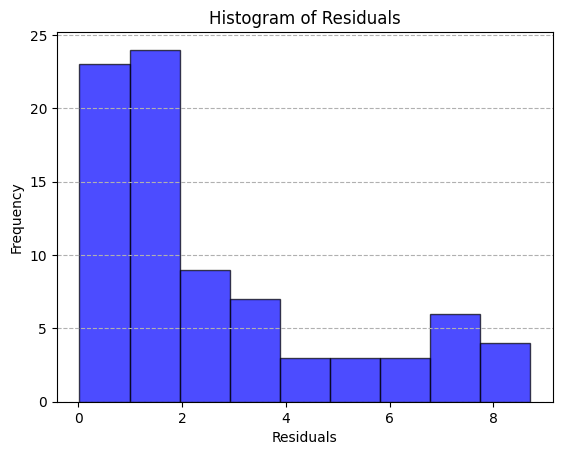

Standard Deviation of Residuals: 2.441650234372629
Assumed Experimental Error: 0.25

The standard deviation (scatter in the residuals data) is higher than the assumed experimental error.


In [7]:
# Unsure if data / plot is correct for project instructions

# Subtract the best fit function from the height data

residuals = data['height'] - tidal_height(data['day'],*params)
plt.scatter(data['day'], np.abs(residuals), color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Residuals')
plt.title('Residuals Plot')
plt.xlabel('Day')
plt.ylabel('Residuals')
plt.legend(loc='lower center', fontsize='x-small')
plt.show()


num_bins = int(np.sqrt(len(residuals)))
plt.hist(np.abs(residuals), bins=num_bins, color='blue', edgecolor='black', alpha=0.7)
plt.grid(axis='y', linestyle='--')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

residuals_std = np.std(np.abs(residuals))
print(f"Standard Deviation of Residuals: {residuals_std}")
print(f"Assumed Experimental Error: {rms_error}\n")

if residuals_std > rms_error:
    print("The standard deviation (scatter in the residuals data) is higher than the assumed experimental error.")
else:
    print("The standard deviation (scatter in the residuals data) is within the assumed experimental error.")


# TO-DO:
# INCLUDE SAVEFIG (PDF) FOR EACH IMAGE/PLOT


In [8]:
time_of_high_tide = 8.5  
predicted_height_jan14 = tidal_height(time_of_high_tide, *params)

# Account for the tsunami
tsunami_effect = 2  # 2ft increase
tsunami_affected_height = predicted_height_jan14 + tsunami_effect


In [9]:
# Already calculated the standard deviation of residuals (residuals_std)
tsunami_deviation_std = (tsunami_affected_height - predicted_height_jan14) / residuals_std
print(f"Tsunami deviation in standard deviations: {tsunami_deviation_std}")


Tsunami deviation in standard deviations: 0.8191181406102955


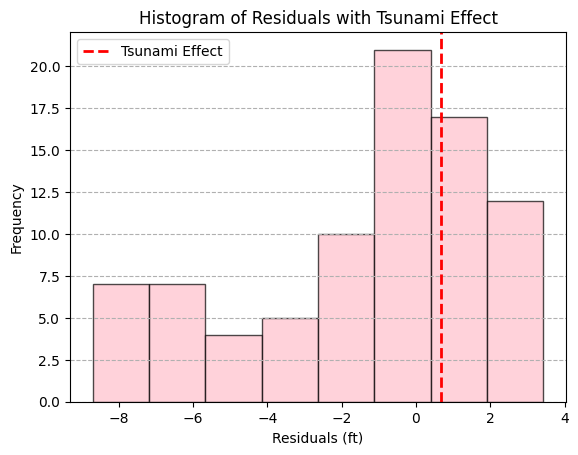

In [10]:
residuals_with_tsunami = np.append(residuals, tsunami_effect - predicted_height_jan14)

# Plot the histogram
plt.hist(residuals_with_tsunami, bins='auto', color='pink', edgecolor='black', alpha=0.7)
plt.axvline(tsunami_effect - predicted_height_jan14, color='red', linestyle='dashed', linewidth=2, label='Tsunami Effect')
plt.grid(axis='y',linestyle='--')
plt.title('Histogram of Residuals with Tsunami Effect')
plt.xlabel('Residuals (ft)')
plt.ylabel('Frequency')
plt.legend()
plt.show()